In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import statistics as st
from statistics import mean
from statistics import median
from statistics import variance
from scipy import stats
import scipy.stats as scst
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import t
import statsmodels.api


import matplotlib.pyplot as plt
import pylab 

In [3]:
# Q1a
data = pd.read_csv (r"weeklies.txt")
#print(data)
diff = data.current - data.lastyear
print(diff)

0    -29.67
1    -17.00
2    -25.05
3     -1.14
4    -51.91
5    -27.09
6     -4.00
7      3.08
8      6.64
9     19.35
10   -44.80
11   -29.89
12     0.70
13   -36.56
14    -6.16
15    40.58
16    18.33
17    -3.41
18    -2.75
dtype: float64


In [5]:
# Q1a
# 1 sample t-test for variable diff
t, p = stats.ttest_1samp(diff, popmean=0) 
#p-value is > 0.05. Hence, do not reject H0 at alpha = 0.05. 
#Conclude: there is no difference between current year and last year.

print('p-value of the test is :',p)

p-value of the test is : 0.08026526054859673


In [6]:
# Q1a
##### Manually form a CI for the difference: D-bar +- t_(n-1)(0.025) *SE(D-bar)
alpha = 0.05 # for 95% CI, can change alpha = 0.01 for 99%CI
prob = 1- alpha /2
from scipy.stats import t
n = len(diff) # sample size
df = len(diff) - 1
CI = [mean(diff) - t.ppf(prob, df)*math.sqrt(variance(diff)/n), mean(diff) + t.ppf(prob, df)*math.sqrt(variance(diff)/n)]
print(CI)

#95% CI for the difference is: (-21.41871,   1.33976).

[-21.41870722879728, 1.3397598603762244]


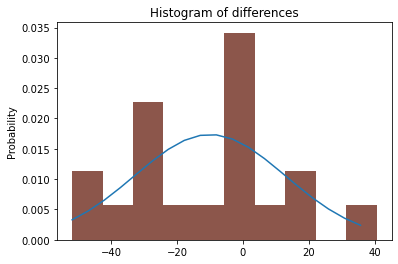

In [7]:
# Q1b
#### checking the assumption = histogram + normal curve; qq plot; and normality test:
# histogram
inter = (max(diff) - min(diff) )/(len(diff)) 
l = list(np.arange((min(diff)),(max(diff)),step = inter))
y = scst.norm.pdf(l,loc = mean(diff),scale = np.std(diff))

plt.plot(l, y)
plt.hist(diff, bins=None, range=None, density=True, color='C5')
plt.title('Histogram of differences') 
plt.xlabel('') 
plt.ylabel('Probability') 
plt.show()



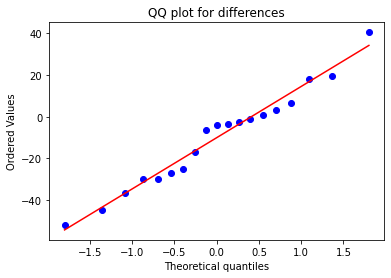

p-value of Shapiro test for differences:  0.8566572070121765


In [8]:
# Q1b
#### checking the assumption = histogram + normal curve; qq plot; and normality test:
#QQ plot and Normality test


scst.probplot(diff, dist = "norm", plot = pylab)
plt.title("QQ plot for differences")
plt.show()

#Shapiro Wilk test of normality
t1, p1 = scst.shapiro(diff) # t = test statistic of this test; p = p-value of this test.

print('p-value of Shapiro test for differences: ', p1 )

In [9]:
# Q1d
##### Manually form a CI for the difference: D-bar +- t_(n-1)(0.025) *SE(D-bar)
alpha = 0.01 #alpha = 0.01 for 99%CI
prob = 1- alpha /2
from scipy.stats import t
n = len(diff) # sample size
df = len(diff) - 1
CI = [mean(diff) - t.ppf(prob, df)*math.sqrt(variance(diff)/n), mean(diff) + t.ppf(prob, df)*math.sqrt(variance(diff)/n)]
print(CI)

# 99% CI for the difference is: (-25.63, 5.55)
# this 99% CI is wider than the 95%CI. The value of the multiplier in the margin of error 
# t_{(n-1), (1-alpha/2)}  is larger when alpha is smaller. 
# That value larger will make the margin of error larger hence the CI is wider.


[-25.629983829671175, 5.551036461250122]


# Q2

In [10]:
#Q2 
data = pd.read_csv(r"machine.txt" ,sep = " ")
print(data)

    strength machine
0       43.6       O
1       78.4       O
2       62.1       O
3       65.1       O
4       69.2       O
..       ...     ...
95      66.0       N
96      82.7       N
97      62.0       N
98      67.0       N
99      70.2       N

[100 rows x 2 columns]


In [11]:
old = data.strength[data.machine == 'O' ]
new = data.strength[data.machine == 'N' ]


In [12]:
#test if variances are equal:
# Barlette test:
Bar = scipy.stats.bartlett(old, new)
print(Bar)
# Levene test:
Levene = scipy.stats.levene(old, new)
print(Levene)
# very large p-value, hence two samples are from two population with same variance.

BartlettResult(statistic=0.6315369490124062, pvalue=0.4267921108095075)
LeveneResult(statistic=0.0004487887283809544, pvalue=0.9831414451925987)


In [13]:
import statsmodels.api
#perform 1sided test to see if New is BETTER than Old:
test4= statsmodels.stats.weightstats.ttest_ind(old, new, alternative='smaller', usevar='pooled', value=0)
print(test4)
#test statistic here < 0, because of Old - New.
#in R, test statistic >0, because of New - Old. 
# You can change the positions as below:
test5= statsmodels.stats.weightstats.ttest_ind(new, old, alternative='larger', usevar='pooled', value=0)
print(test5)

(-3.9304389129902852, 7.90521258209538e-05, 98.0)
(3.9304389129902852, 7.90521258209538e-05, 98.0)


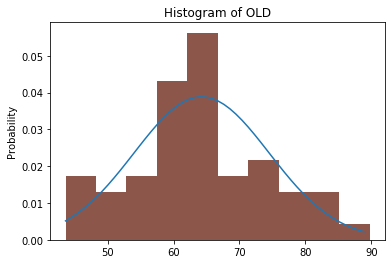

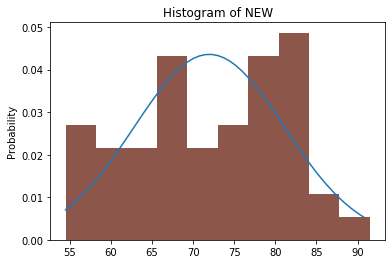

In [26]:
#Q2: Normality checkings: histogram + normal curve
inter = (max(old) - min(old) )/(len(old)) 
l = list(np.arange((min(old)),(max(old)),step = inter))
y = scst.norm.pdf(l,loc = mean(old),scale = np.std(old))

plt.plot(l, y)
plt.hist(old, bins=None, range=None, density=True, color='C5')
plt.title('Histogram of OLD') 
plt.xlabel('') 
plt.ylabel('Probability') 
plt.show()

inter = (max(new) - min(new) )/(len(new)) 
l = list(np.arange((min(new)),(max(new)),step = inter))
y = scst.norm.pdf(l,loc = mean(new),scale = np.std(new))

plt.plot(l, y)
plt.hist(new, bins=None, range=None, density=True, color='C5')
plt.title('Histogram of NEW') 
plt.xlabel('') 
plt.ylabel('Probability') 
plt.show()

In [25]:
#Q2: Normality checkings: QQ plot
from scipy.stats import shapiro
Shapiro1 = scipy.stats.shapiro(old) 
print(Shapiro1)
Shapiro2 = scipy.stats.shapiro(new) 
print(Shapiro2)

# both samples are normal

(0.9837276339530945, 0.7158327698707581)
(0.9641383290290833, 0.13248981535434723)


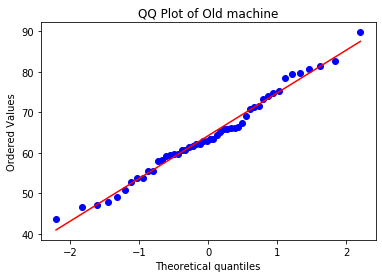

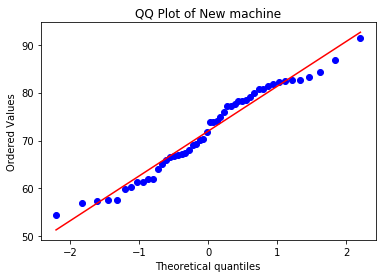

In [24]:
#Q2: QQ plots
scst.probplot(old, dist="norm", plot=pylab)
pylab.title('QQ Plot of Old machine') 
pylab.show()
scst.probplot(new, dist="norm", plot=pylab)
pylab.title('QQ Plot of New machine') 
pylab.show()

In [ ]:
# Q2 conclude about assumptions for a Two sampes independent t-test: all met
# sample sizes are large (50 and 50)
# equal variances
# each sample is from a normal or approximately normal distribution

In [14]:
#Q3  wip data

data = pd.read_csv(r"wip.txt" ,sep = " ")
print(data)


     time  plant
0    5.62      1
1    5.29      1
2   16.25      1
3   10.92      1
4   11.46      1
5   21.62      1
6    8.45      1
7    8.58      1
8    5.41      1
9   11.42      1
10  11.62      1
11   7.29      1
12   7.50      1
13   7.96      1
14   4.42      1
15  10.50      1
16   7.58      1
17   9.29      1
18   7.54      1
19   8.92      1
20   9.54      2
21  11.46      2
22  16.62      2
23  12.62      2
24  25.75      2
25  15.41      2
26  14.29      2
27  13.13      2
28  13.71      2
29  10.04      2
30   5.75      2
31  12.46      2
32   9.17      2
33  13.21      2
34   6.00      2
35   2.33      2
36  14.25      2
37   5.37      2
38   6.25      2
39   9.71      2


In [15]:
plant_one = data.time[data.plant == 1 ]
plant_two = data.time[data.plant == 2 ]

test6 = scipy.stats.mannwhitneyu(plant_one, plant_two, use_continuity=True, alternative='two-sided')
#this test is Wilcoxon Rank Sum test
print(test6)

MannwhitneyuResult(statistic=135.5, pvalue=0.08340060579536013)


In [ ]:
# These are 2 independent samples.
# Hence, Wilcoxon rank sum test to determine if there is a difference between the processing times of the two plants.

# Conclude: There is not very strong evidence to show that the processing times for the two plants are different
# since the two-sided p-value is not very small (0.0834).
